In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import SimpSOM as sps
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

SimpSOM Documentation
https://simpsom.readthedocs.io/_/downloads/en/latest/pdf/

reference: https://dalicodes.medium.com/overview-of-self-organizing-maps-som-with-its-python-implementation-in-determining-safe-airlines-db8f6018a2b

In [2]:
X = pd.read_csv("../RF_important_features.csv.gzip", compression="gzip")
y = pd.read_csv("../y.csv")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.05, random_state = 111, shuffle = True)

Build a network 20x20 with a weights format taken from the input data and activate Periodic Boundary Conditions.

In [13]:
net = sps.somNet(20, 20, X.values, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


Train the network for 1000 epochs and with initial learning rate of 0.01.

In [14]:
net.train(0.01, 2000)

Training SOM... done!


In [15]:
#Save the weights to file
net.save("SOM_weights_20x20_0.01_2000")

In [4]:
#net = sps.somNet(50, 50, X.values, loadFile='SOM_weights_50x50_0.01_1000.npy', PBC=True)

Periodic Boundary Conditions active.
The weights will be loaded from file.


Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset #and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=0) net.diff_graph()

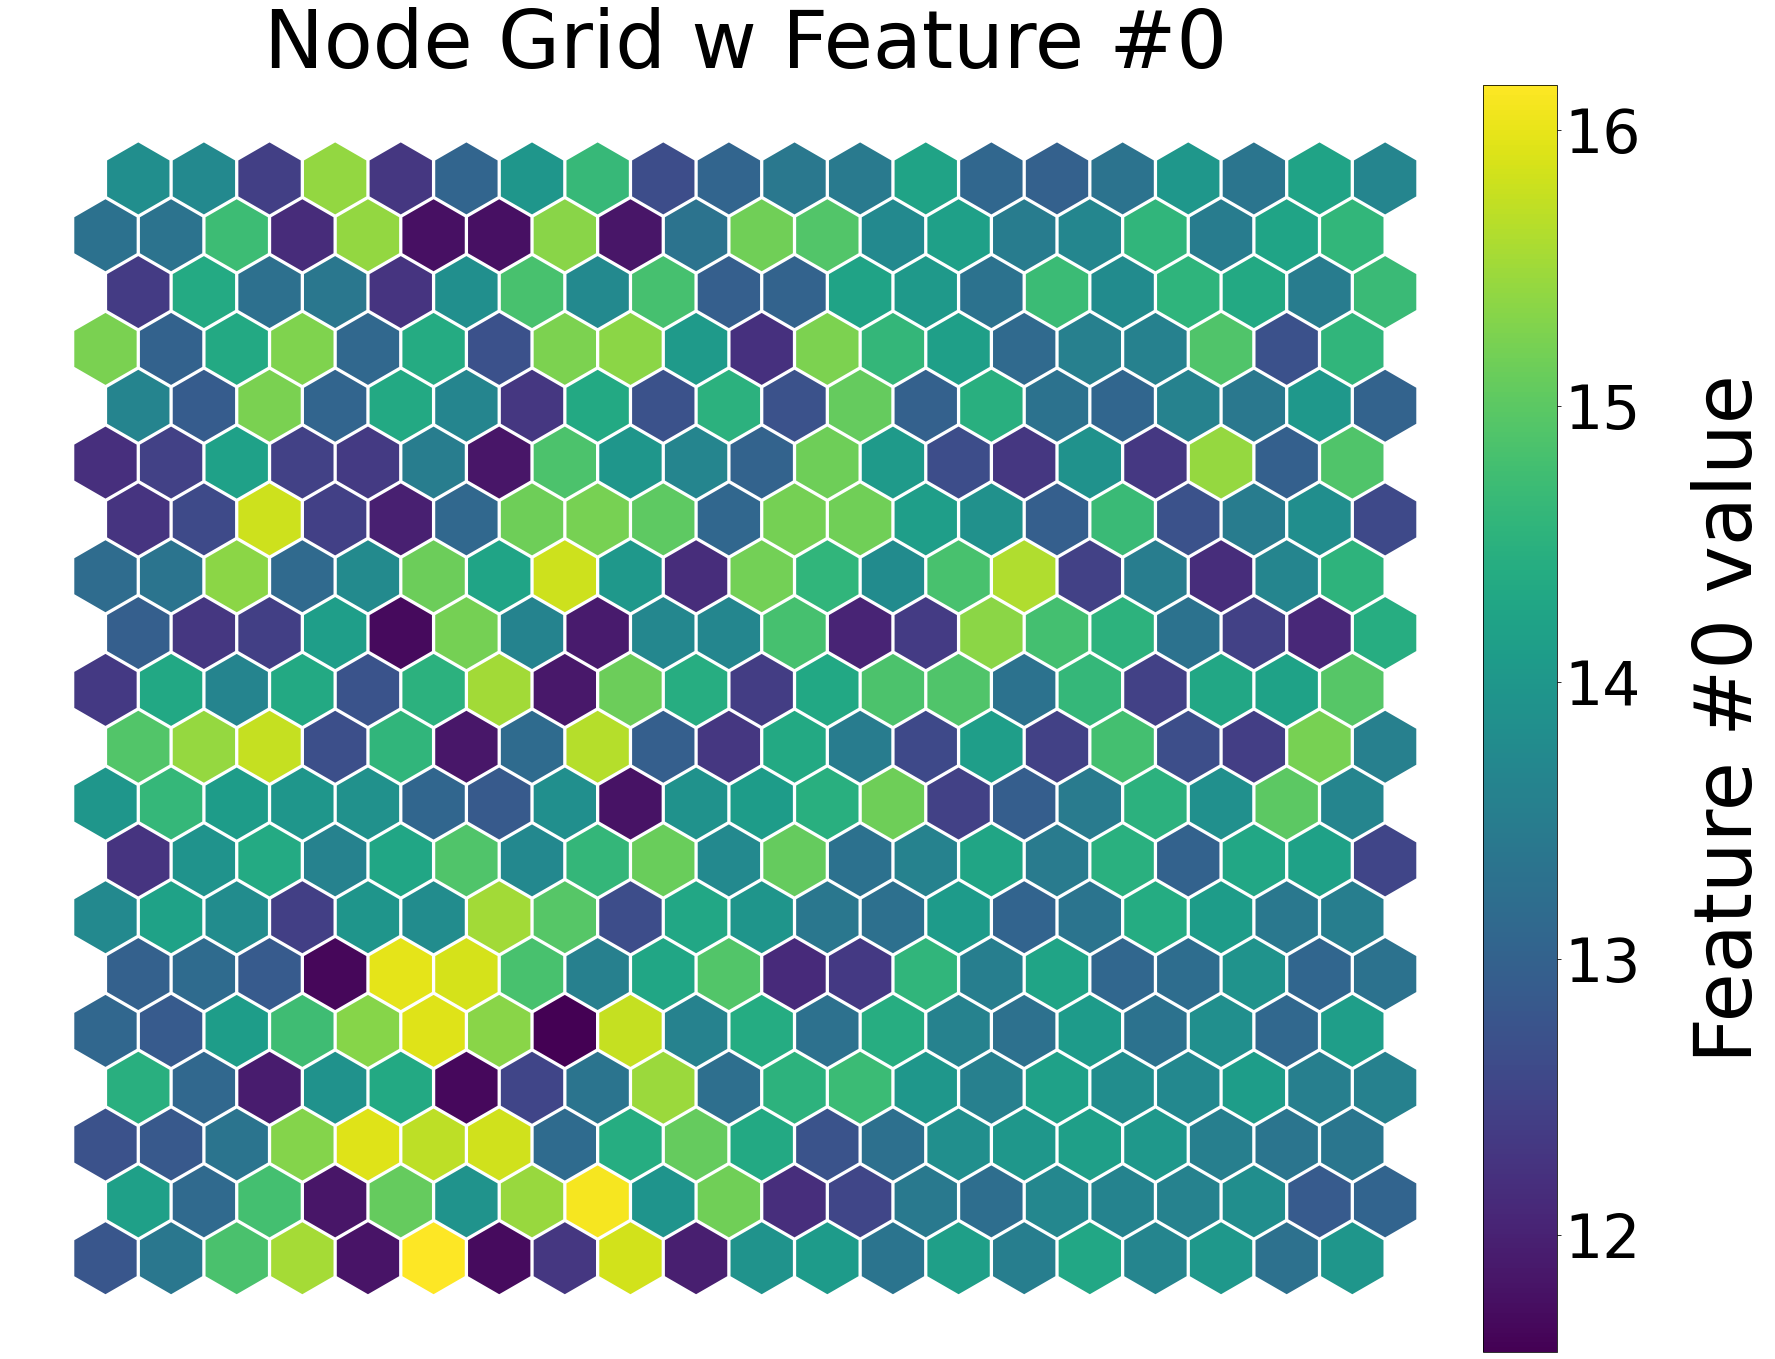

In [25]:
net.nodes_graph(colnum=0)

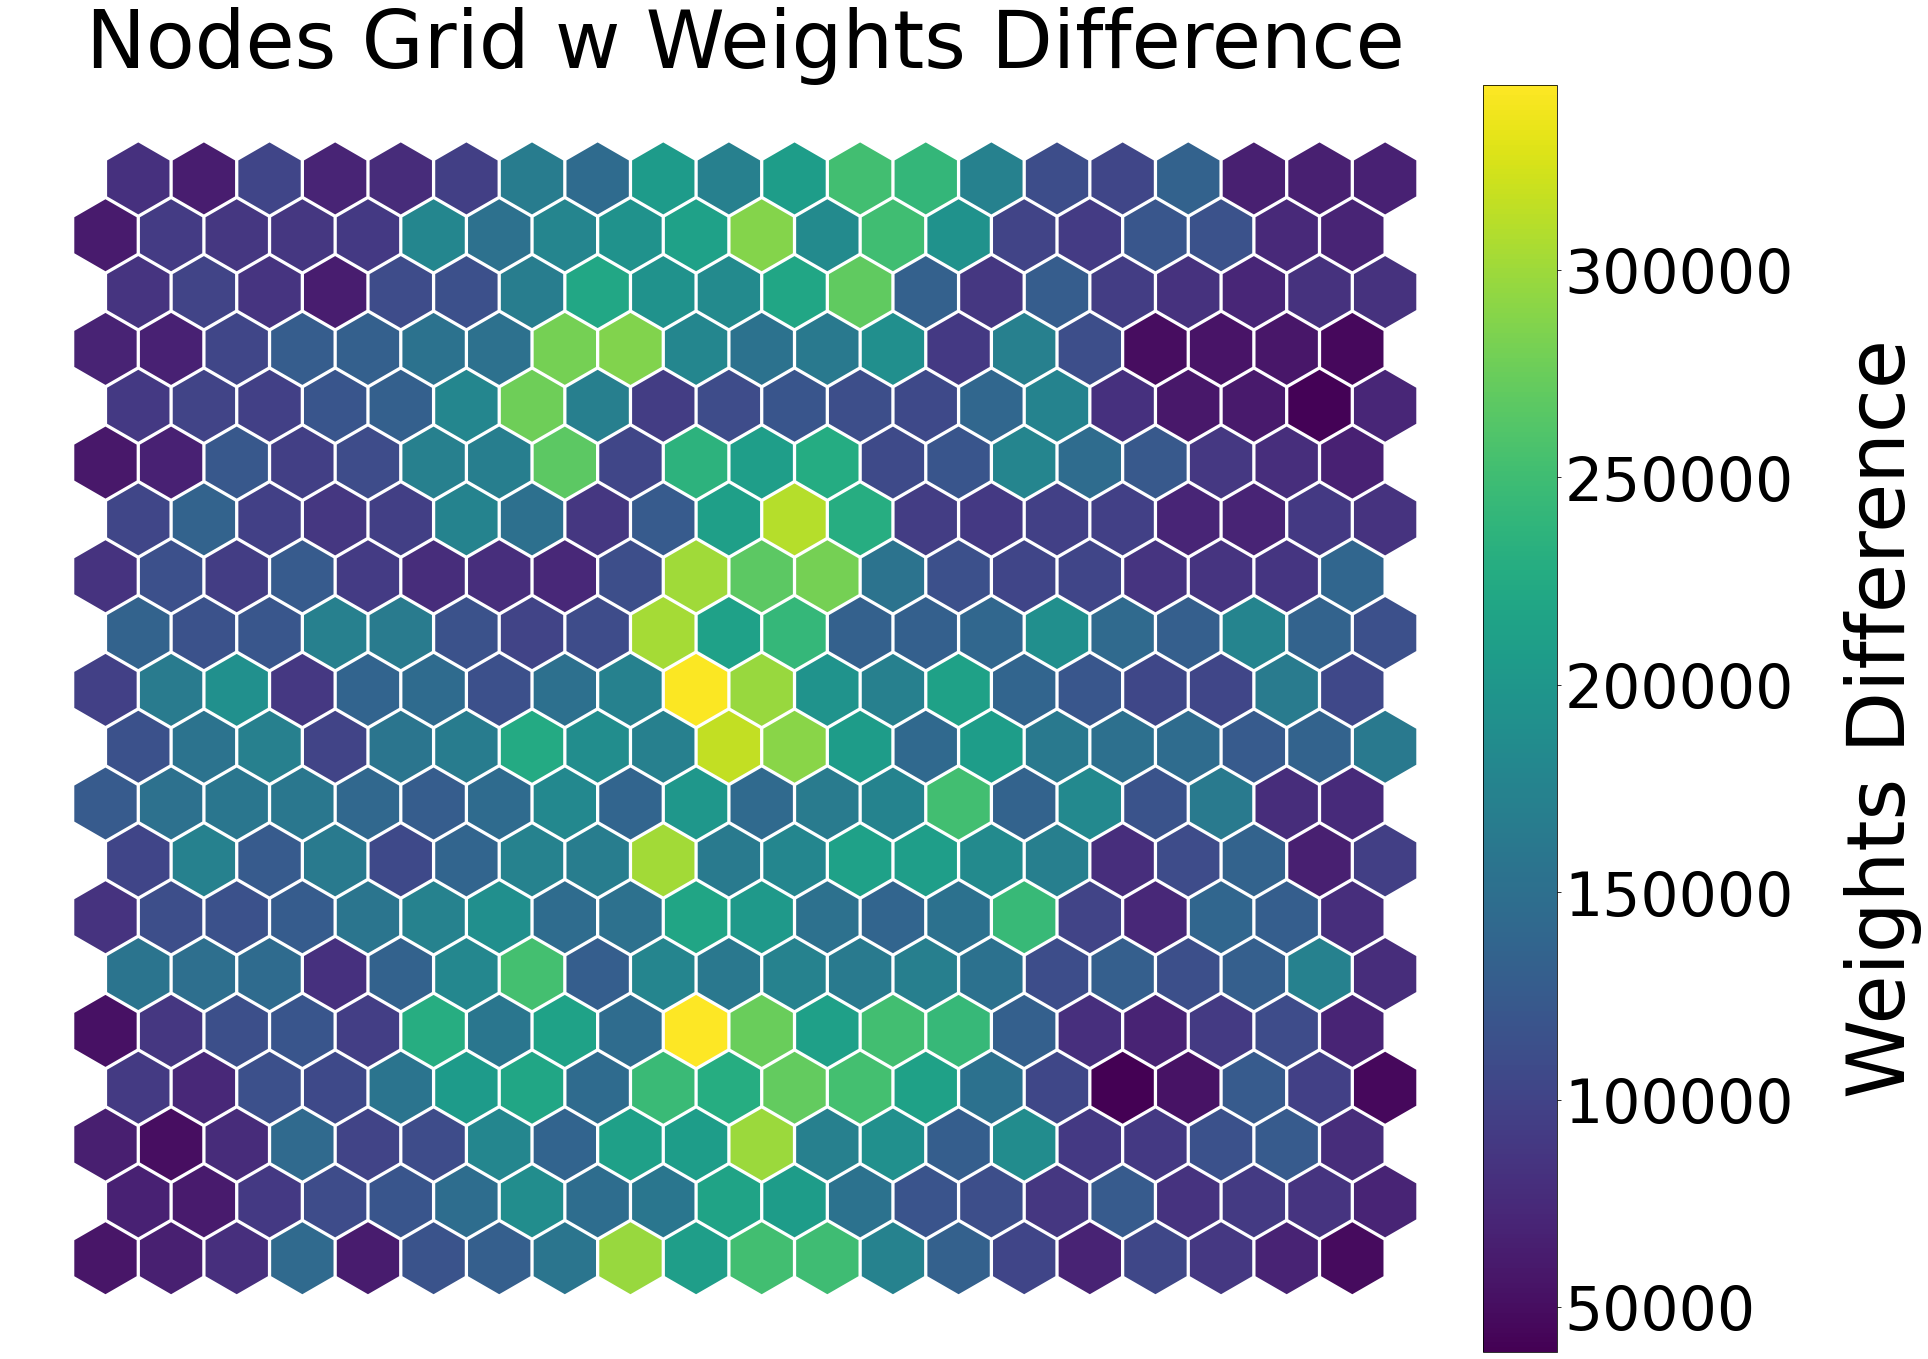

In [20]:
net.diff_graph()


Project the datapoints on the new 2D network map. net.project(raw_data, labels=labels)

In [26]:
prj = np.array(net.project(X.values, labels=y.values))
SOM_df = pd.DataFrame(prj, columns = ['Column_A','Column_B'])
SOM_df.to_csv("SOM_dimensions_with_labels.csv", index=False)

<Figure size 432x288 with 0 Axes>

In [16]:
prj2 = np.array(net.project(X.values))
SOM_df2 = pd.DataFrame(prj2, columns = ['Column_A','Column_B'])
SOM_df2.to_csv("SOM_dimensions_20x20_0.01_2000.csv", index=False)

<Figure size 432x288 with 0 Axes>

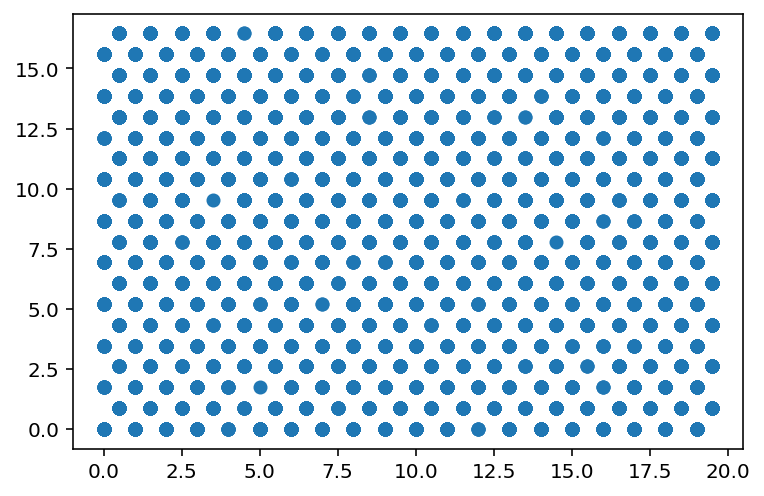

In [29]:
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Cluster the datapoints according to the Quality Threshold algorithm. net.cluster(raw_data,
type=’qthresh’)

In [ ]:
#net.cluster(X_train.values, type='qthresh')



To load the weights from a previous run you will need to initialize a new net object. The dimensions will be overwritten
by the saved weights format:

net = sps.somNet(20, 20, raw_data, loadFile=’weights.npy’)
